In [39]:
# import autograd functionally
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad

# import various other libraries
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy lotted inline
from matplotlib import rcParams
rcParams["figure.autolayout"] = True
import os

In [40]:
# gradient descent function
def gradient_descent(g, w ,alpha, max_its, beta):
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    # push the first w
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros(np.shape(w))  # momentum term

    # over the line
    for k in range(max_its):
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        # take descent step with momentum
        z = beta * z + grad_eval
        w = w -alpha * z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

def plotting(cost_hist, ylabelName, label):
    figure, axes = plt.subplots(1,1, figsize = (6,5))
    axes.plot(range(len(cost_hist)),cost_hist, label = label, linestyle = "solid")
    axes.set_xlabel("iterations")
    axes.set_ylabel(ylabelName)
    axes.legend()
    plt.show()

In [41]:
csvname = '4class_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1:]
y_true = data[:,-1]

In [42]:
# now we should normalize the weights before
def normalization(w):
    slice = w[1:]
    norm = np.sum(np.power(slice,2),axis = 0)**0.5
    result = w/norm
    return result

def model(x,w):
    w = normalization(w)
    result = w[0] + np.dot(x, w[1:])
    return result
    
def multi_class(w):
    all_evals = model(x,w)
    # select the maximum across data points
    a = np.max(all_evals, axis = 1)
    # select the corresponding column
    b = all_evals[np.arange(np.size(y)),y.astype(int).flatten()]
    cost = np.sum(a - b)
    cost = cost + 10**-5*np.linalg.norm(w[1:],'fro')**2
    return cost/float(np.size(y))

def predict(weight):
    index = np.argmax(model(x, weight), axis = 1)
    correct_num = np.sum(np.array(index == y_true, dtype = int))
    wrong_num = np.size(y_true) - correct_num
    accuracy = correct_num/np.size(y_true)
    return wrong_num, accuracy

In [43]:
# initialize parameters
np.random.seed(33)
alpha = 0.05
max_its = 200
gamma = 0
w_init = np.random.randn(x.shape[1]+1, np.max(y).astype(int)+1)

In [44]:
# run gradient descent, create cost function history
weight_history = gradient_descent(multi_class, w_init, alpha, max_its,beta = gamma)
# use MSE to validate the regression quality
cost_history = [multi_class(v) for v in weight_history]
best_w = weight_history[-1]

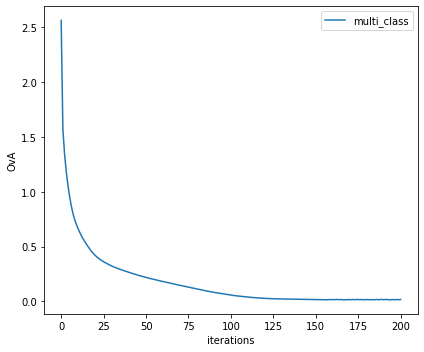

In [45]:
plotting(cost_history,"OvA","multi_class")

In [46]:
predict(best_w)

(7, 0.825)

Now the misclassification number is 7, and the total accuracy is 0.825.